# FLIGHT PRICE PREDICTION

Datasource : https://www.machinehack.com/course/predict-the-flight-ticket-price-hackathon/

#### Predict The Flight Ticket Price Hackathon
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES: Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all the rows of the dataframe
pd.pandas.set_option('display.max_rows',None)

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
train_df=pd.read_excel(r"Data_Train.xlsx")
test_df=pd.read_excel(r"Test_set.xlsx")

train_df.head()

In [3]:
test_df.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

Lets see how we will do the feature engineering in this as it has :   
    Time variables   
    Route - multiple destinations - how this can be handled as categorical variable

In [4]:
# As this is a hackathon , hence we will create a dataset by combining train & test df
big_df=train_df.append(test_df,sort=False)
big_df.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0  
1    05:50         13:15   7h 25m     2 stops         No info   7662.0  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0  
3    18:05         23:30   5h 25m      1 stop         No info   6218.0  
4    16:50         21:35   4h 45m      1 stop         No info  13302.0

In [5]:
big_df.shape

(13354, 11)

In [6]:
# test df doesn't have price columns , hence the price column will be NaN
big_df.tail()

Airline Date_of_Journey   Source Destination            Route  \
2666          Air India       6/06/2019  Kolkata    Banglore  CCU → DEL → BLR   
2667             IndiGo      27/03/2019  Kolkata    Banglore        CCU → BLR   
2668        Jet Airways       6/03/2019    Delhi      Cochin  DEL → BOM → COK   
2669          Air India       6/03/2019    Delhi      Cochin  DEL → BOM → COK   
2670  Multiple carriers      15/06/2019    Delhi      Cochin  DEL → BOM → COK   

     Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
2666    20:30  20:25 07 Jun  23h 55m      1 stop         No info    NaN  
2667    14:20         16:55   2h 35m    non-stop         No info    NaN  
2668    21:50  04:25 07 Mar   6h 35m      1 stop         No info    NaN  
2669    04:00         19:15  15h 15m      1 stop         No info    NaN  
2670    04:55         19:15  14h 20m      1 stop         No info    NaN

In [7]:
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

All the features are object type, only price is of floating value

### Feature Engineering

##### DATE FEATURES
Split this into day, month and year and then drop the column

In [8]:
big_df['Date']=big_df['Date_of_Journey'].str.split('/').str[0]
big_df['Month'] = big_df['Date_of_Journey'].str.split('/').str[1]
big_df['Year']=big_df['Date_of_Journey'].str.split('/').str[2]

big_df.head()


Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info    Price Date  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897.0   24   
1    05:50         13:15   7h 25m     2 stops         No info   7662.0    1   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882.0    9   
3    18:05         23:30   5h 25m      1 stop         No info   6218.0   12   
4    16:50         21:35   4h 45m      1 stop         No info  13302.0   01   

  Month  Year  
0    03  2019  
1    05  2019  
2    06  2019  
3    05  2019  
4    03  2019

In [9]:
# Lets see what is the datatypes of the 3 new columns added above
big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [10]:
# As the three new columns as objects, first we need to convert this into integers
big_df['Date']= big_df['Date'].astype(int)
big_df['Month']= big_df['Month'].astype(int)
big_df['Year']= big_df['Year'].astype(int)

big_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [11]:
# Lets drop the "Date of Journey" column

big_df= big_df.drop (['Date_of_Journey'],axis=1)
big_df.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info    Price  Date  Month  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897.0    24      3   
1         13:15   7h 25m     2 stops         No info   7662.0     1      5   
2  04:25 10 Jun      19h     2 stops         No info  13882.0     9      6   
3         23:30   5h 25m      1 stop         No info   6218.0    12      5   
4         21:35   4h 45m      1 stop         No info  13302.0     1      3   

   Year  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019

In [12]:
# For the Arrival time , we need to separate the date from the arrival time as the date doesn't add any value
big_df['Arrival_Time']= big_df['Arrival_Time'].str.split(" ").str[0]

big_df.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

  Arrival_Time Duration Total_Stops Additional_Info    Price  Date  Month  \
0        01:10   2h 50m    non-stop         No info   3897.0    24      3   
1        13:15   7h 25m     2 stops         No info   7662.0     1      5   
2        04:25      19h     2 stops         No info  13882.0     9      6   
3        23:30   5h 25m      1 stop         No info   6218.0    12      5   
4        21:35   4h 45m      1 stop         No info  13302.0     1      3   

   Year  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019

In [13]:
# Count of null values in the dataset
big_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [14]:
# Lets see the record where it is null in Total_stops
big_df[big_df['Total_Stops'].isnull()]

Airline Source Destination Route Dep_Time Arrival_Time Duration  \
9039  Air India  Delhi      Cochin   NaN    09:45        09:25  23h 40m   

     Total_Stops Additional_Info   Price  Date  Month  Year  
9039         NaN         No info  7480.0     6      5  2019

In [15]:
# As the source and destination is Delhi to Cochin, let's replace that NaN value with '1 stop'
big_df['Total_Stops']=big_df['Total_Stops'].fillna('1 stop')

In [16]:
# for the 'Total_Stops' feature, there is a categorical label called "non-stop. Let's replace that with " 0 stops"
big_df['Total_Stops'] = big_df['Total_Stops'].replace('non-stop', '0 stop')
big_df.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

  Arrival_Time Duration Total_Stops Additional_Info    Price  Date  Month  \
0        01:10   2h 50m      0 stop         No info   3897.0    24      3   
1        13:15   7h 25m     2 stops         No info   7662.0     1      5   
2        04:25      19h     2 stops         No info  13882.0     9      6   
3        23:30   5h 25m      1 stop         No info   6218.0    12      5   
4        21:35   4h 45m      1 stop         No info  13302.0     1      3   

   Year  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019

In [17]:
# Lets split the number from the value of "Total_stops" feature
big_df['Total_Stops']= big_df['Total_Stops'].str.split(" ").str[0]
big_df.head()


Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

  Arrival_Time Duration Total_Stops Additional_Info    Price  Date  Month  \
0        01:10   2h 50m           0         No info   3897.0    24      3   
1        13:15   7h 25m           2         No info   7662.0     1      5   
2        04:25      19h           2         No info  13882.0     9      6   
3        23:30   5h 25m           1         No info   6218.0    12      5   
4        21:35   4h 45m           1         No info  13302.0     1      3   

   Year  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019

In [18]:
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [19]:
# Let convert the "Total Stops" dtype from object to int
big_df['Total_Stops']=big_df['Total_Stops'].astype(int)
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [20]:
# The column "Arrival time" needs to be splitted into hours and min , followed by converting the datatype to int and dropping the main feature

#split
big_df['Arr_Hr'] = big_df['Arrival_Time'] .str.split(':').str[0]
big_df['Arr_Min'] = big_df['Arrival_Time'] .str.split(':').str[1]

big_df.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

  Arrival_Time Duration  Total_Stops Additional_Info    Price  Date  Month  \
0        01:10   2h 50m            0         No info   3897.0    24      3   
1        13:15   7h 25m            2         No info   7662.0     1      5   
2        04:25      19h            2         No info  13882.0     9      6   
3        23:30   5h 25m            1         No info   6218.0    12      5   
4        21:35   4h 45m            1         No info  13302.0     1      3   

   Year Arr_Hr Arr_Min  
0  2019     01      10  
1  2019     13      15  
2  2019     04      25  
3  2019     23      30  
4  2019     21      35

In [21]:
# Converting the datatype to int
big_df['Arr_Hr']=big_df['Arr_Hr'].astype(int)
big_df['Arr_Min']=big_df['Arr_Min'].astype(int)
big_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arr_Hr               int32
Arr_Min              int32
dtype: object

In [22]:
#drop parent feature column "Arrival_Time "
big_df= big_df.drop('Arrival_Time', axis=1)
big_df.head()

Airline    Source Destination                  Route Dep_Time Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   4h 45m   

   Total_Stops Additional_Info    Price  Date  Month  Year  Arr_Hr  Arr_Min  
0            0         No info   3897.0    24      3  2019       1       10  
1            2         No info   7662.0     1      5  2019      13       15  
2            2         No info  13882.0     9      6  2019       4       25  
3            1         No info   6218.0    12      5  2019      23       30  
4            1         No info  13302.0     1      3  2019      21       35

In [23]:
# # The column "Dep_Time" needs to be splitted into hours and min , followed by converting the datatype to int and dropping the main feature

#split
big_df['Dep_Hr'] = big_df['Dep_Time'] .str.split(':').str[0]
big_df['Dep_Min'] = big_df['Dep_Time'] .str.split(':').str[1]

# Converting the datatype to int
big_df['Dep_Hr']=big_df['Dep_Hr'].astype(int)
big_df['Dep_Min']=big_df['Dep_Min'].astype(int)

#drop parent feature column "Arrival_Time "
big_df= big_df.drop('Dep_Time', axis=1)
big_df.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

   Total_Stops Additional_Info    Price  Date  Month  Year  Arr_Hr  Arr_Min  \
0            0         No info   3897.0    24      3  2019       1       10   
1            2         No info   7662.0     1      5  2019      13       15   
2            2         No info  13882.0     9      6  2019       4       25   
3            1         No info   6218.0    12      5  2019      23       30   
4            1         No info  13302.0     1      3  2019      21       35   

   Dep_Hr  Dep_Min  
0      22       20  
1       5       50  
2       9       25  
3      18        5  
4      16       50

In [24]:
# Lets work on the Route column where we have to split based on arrow mark

big_df['Route_0']= big_df['Route'].str.split("→").str[0]
big_df['Route_1']= big_df['Route'].str.split("→").str[1]
big_df['Route_2']= big_df['Route'].str.split("→").str[2]
big_df['Route_3']= big_df['Route'].str.split("→").str[3]
big_df['Route_4']= big_df['Route'].str.split("→").str[4]

# drop the route column
big_df=big_df.drop(['Route'],axis=1)

big_df.head()

Airline    Source Destination Duration  Total_Stops Additional_Info  \
0       IndiGo  Banglore   New Delhi   2h 50m            0         No info   
1    Air India   Kolkata    Banglore   7h 25m            2         No info   
2  Jet Airways     Delhi      Cochin      19h            2         No info   
3       IndiGo   Kolkata    Banglore   5h 25m            1         No info   
4       IndiGo  Banglore   New Delhi   4h 45m            1         No info   

     Price  Date  Month  Year  Arr_Hr  Arr_Min  Dep_Hr  Dep_Min Route_0  \
0   3897.0    24      3  2019       1       10      22       20    BLR    
1   7662.0     1      5  2019      13       15       5       50    CCU    
2  13882.0     9      6  2019       4       25       9       25    DEL    
3   6218.0    12      5  2019      23       30      18        5    CCU    
4  13302.0     1      3  2019      21       35      16       50    BLR    

  Route_1 Route_2 Route_3 Route_4  
0     DEL     NaN     NaN     NaN  
1    IXR     BBI      BLR     NaN  
2    LKO     BOM      COK     NaN  
3    NAG      BLR     NaN     NaN  
4    NAG      DEL     NaN     NaN

In [25]:
# Lets split the Duration feature and convert the type as well as drop the feature

#split
big_df['Dur_Hr'] = big_df['Duration'] .str.split(" ").str[0]
big_df['Dur_Min'] = big_df['Duration'] .str.split(" ").str[1]

big_df.head()

Airline    Source Destination Duration  Total_Stops Additional_Info  \
0       IndiGo  Banglore   New Delhi   2h 50m            0         No info   
1    Air India   Kolkata    Banglore   7h 25m            2         No info   
2  Jet Airways     Delhi      Cochin      19h            2         No info   
3       IndiGo   Kolkata    Banglore   5h 25m            1         No info   
4       IndiGo  Banglore   New Delhi   4h 45m            1         No info   

     Price  Date  Month  Year  Arr_Hr  Arr_Min  Dep_Hr  Dep_Min Route_0  \
0   3897.0    24      3  2019       1       10      22       20    BLR    
1   7662.0     1      5  2019      13       15       5       50    CCU    
2  13882.0     9      6  2019       4       25       9       25    DEL    
3   6218.0    12      5  2019      23       30      18        5    CCU    
4  13302.0     1      3  2019      21       35      16       50    BLR    

  Route_1 Route_2 Route_3 Route_4 Dur_Hr Dur_Min  
0     DEL     NaN     NaN     NaN     2h     50m  
1    IXR     BBI      BLR     NaN     7h     25m  
2    LKO     BOM      COK     NaN    19h     NaN  
3    NAG      BLR     NaN     NaN     5h     25m  
4    NAG      DEL     NaN     NaN     4h     45m

In [26]:
big_df['Dur_Hr']=big_df['Dur_Hr'].str.split("h").str[0]
big_df['Dur_Min']=big_df['Dur_Min'].str.split("m").str[0]

big_df.head()


Airline    Source Destination Duration  Total_Stops Additional_Info  \
0       IndiGo  Banglore   New Delhi   2h 50m            0         No info   
1    Air India   Kolkata    Banglore   7h 25m            2         No info   
2  Jet Airways     Delhi      Cochin      19h            2         No info   
3       IndiGo   Kolkata    Banglore   5h 25m            1         No info   
4       IndiGo  Banglore   New Delhi   4h 45m            1         No info   

     Price  Date  Month  Year  Arr_Hr  Arr_Min  Dep_Hr  Dep_Min Route_0  \
0   3897.0    24      3  2019       1       10      22       20    BLR    
1   7662.0     1      5  2019      13       15       5       50    CCU    
2  13882.0     9      6  2019       4       25       9       25    DEL    
3   6218.0    12      5  2019      23       30      18        5    CCU    
4  13302.0     1      3  2019      21       35      16       50    BLR    

  Route_1 Route_2 Route_3 Route_4 Dur_Hr Dur_Min  
0     DEL     NaN     NaN     NaN      2      50  
1    IXR     BBI      BLR     NaN      7      25  
2    LKO     BOM      COK     NaN     19     NaN  
3    NAG      BLR     NaN     NaN      5      25  
4    NAG      DEL     NaN     NaN      4      45

In [27]:
big_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Duration               0
Total_Stops            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Arr_Hr                 0
Arr_Min                0
Dep_Hr                 0
Dep_Min                0
Route_0                1
Route_1                1
Route_2             4341
Route_3            11397
Route_4            13296
Dur_Hr                 0
Dur_Min             1286
dtype: int64

In [28]:
# Convert the NAN values to 0 in Dur_min feature
big_df['Dur_Min'].fillna(0,inplace=True )
big_df['Dur_Min'].isnull().sum()


0

In [29]:
# Converting the datatype to int
big_df['Dur_Hr']=big_df['Dur_Hr'].astype(int)
big_df['Dur_Min']=big_df['Dur_Min'].astype(int)
big_df.dtypes

Airline             object
Source              object
Destination         object
Duration            object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Arr_Hr               int32
Arr_Min              int32
Dep_Hr               int32
Dep_Min              int32
Route_0             object
Route_1             object
Route_2             object
Route_3             object
Route_4             object
Dur_Hr               int32
Dur_Min              int32
dtype: object

In [30]:
#drop parent feature column "Arrival_Time "
big_df= big_df.drop('Duration', axis=1)

### Lets find out the  NAN values of dataset

In [31]:
big_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Arr_Hr                 0
Arr_Min                0
Dep_Hr                 0
Dep_Min                0
Route_0                1
Route_1                1
Route_2             4341
Route_3            11397
Route_4            13296
Dur_Hr                 0
Dur_Min                0
dtype: int64

In [32]:
# Lets fix the NAN values of the PRICE feature
big_df['Price'].fillna((big_df['Price'].mean()),inplace=True)

In [33]:
# Lets fix the NAN values of Route features. We will replace it with a new label ='None"
big_df['Route_0'].fillna('None',inplace=True )
big_df['Route_1'].fillna('None',inplace=True )
big_df['Route_2'].fillna('None',inplace=True )
big_df['Route_3'].fillna('None',inplace=True )
big_df['Route_4'].fillna('None',inplace=True )

In [34]:
big_df.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arr_Hr             0
Arr_Min            0
Dep_Hr             0
Dep_Min            0
Route_0            0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Dur_Hr             0
Dur_Min            0
dtype: int64

All the Nan values have been handled now

#### We will use Label enconding instead of One hot encoding for the SOurce and Destination features .
Label encoding : gives number as 0, 1, 2, 3
One hot encoding :Create no of features = no of labels -1 ( dummy variable trap)

In [36]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
big_df['Airline']=encoder.fit_transform(big_df['Airline'])
big_df['Source']=encoder.fit_transform(big_df['Source'])
big_df['Destination']=encoder.fit_transform(big_df['Destination'])
big_df['Additional_Info']=encoder.fit_transform(big_df['Additional_Info'])

big_df['Route_0']=encoder.fit_transform(big_df['Route_0'])
big_df['Route_1']=encoder.fit_transform(big_df['Route_1'])
big_df['Route_2']=encoder.fit_transform(big_df['Route_2'])
big_df['Route_3']=encoder.fit_transform(big_df['Route_3'])
big_df['Route_4']=encoder.fit_transform(big_df['Route_4'])


In [37]:
big_df.head()

Airline  Source  Destination  Total_Stops  Additional_Info    Price  Date  \
0        3       0            5            0                8   3897.0    24   
1        1       3            0            2                8   7662.0     1   
2        4       2            1            2                8  13882.0     9   
3        3       3            0            1                8   6218.0    12   
4        3       0            5            1                8  13302.0     1   

   Month  Year  Arr_Hr  Arr_Min  Dep_Hr  Dep_Min  Route_0  Route_1  Route_2  \
0      3  2019       1       10      22       20        0       13       30   
1      5  2019      13       15       5       50        2       25        1   
2      6  2019       4       25       9       25        3       32        4   
3      5  2019      23       30      18        5        2       34        3   
4      3  2019      21       35      16       50        0       34        8   

   Route_3  Route_4  Dur_Hr  Dur_Min  
0       13        5       2       50  
1        3        5       7       25  
2        5        5      19        0  
3       13        5       5       25  
4       13        5       4       45

In [38]:
big_df.dtypes

Airline              int32
Source               int32
Destination          int32
Total_Stops          int32
Additional_Info      int32
Price              float64
Date                 int32
Month                int32
Year                 int32
Arr_Hr               int32
Arr_Min              int32
Dep_Hr               int32
Dep_Min              int32
Route_0              int32
Route_1              int32
Route_2              int32
Route_3              int32
Route_4              int32
Dur_Hr               int32
Dur_Min              int32
dtype: object

Our Feature Engineering is done and set :)   
All the features have been converted to integer datatypes and no missing values .     
The dataset looks lovely ;)

## FEATURE SELECTION 

In [39]:
# We will use LASSO regression for selecting the features

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [40]:
# train and test data segregation as initially we had combined everything
df_train=big_df[0:16083]
df_test=big_df[16083:]

In [41]:
#Independent features 
X=df_train.drop (['Price'], axis=1)

#Dependent feature
y=df_train['Price']

##### TRAIN TEST SPLIT 

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3 , random_state=0)


### Using Lasso and SelectFromModel

In [44]:
# select a suitable alpha value ( Alpha= penalty parameter to penalize more features if features are increased)
# Larger alpha value = less features selection 
# you can also do hyperparameter tuning to selct an alpha value
#SelectFromModel - Meta transformer for selecting features based on importance weights ( hereestimator =alpha)

model= SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [45]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [46]:
# To see which features got selected - get_support()
model.get_support()


array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [48]:
selected_features=X_train.columns[(model.get_support())]
selected_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Arr_Hr', 'Arr_Min', 'Dep_Hr', 'Dep_Min', 'Route_0',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Dur_Hr', 'Dur_Min'],
      dtype='object')

In [49]:
# We will be dropping YEAR feature as it will not be used

X_train.drop(['Year'], axis=1)

Airline  Source  Destination  Total_Stops  Additional_Info  Date  \
8876         4       3            0            1                5     1   
1443         4       3            0            1                8     9   
8835         4       3            0            1                8    12   
8572         6       2            1            1                8    27   
981          3       3            0            0                8    15   
4345         4       2            1            2                8     9   
8388         4       3            0            1                8    12   
1478         1       2            1            2                8    15   
8234         3       3            0            0                8     3   
9335        10       0            2            0                8     6   
150          8       3            0            0                8     3   
8433         1       0            5            1                8    21   
2581         4       0            5            1                8     1   
5091         6       2            1            1                8     9   
4114         1       0            5            1                8     9   
3699         4       3            0            1                5    18   
9442         3       2            1            1                8     3   
7912         4       2            1            2                5    15   
5690         1       2            1            1                8    21   
4240         6       2            1            1                8     6   
10293        4       2            1            1                8    27   
2735         1       3            0            2                8    12   
83           3       2            1            1                8    27   
6260         4       2            1            1                8     1   
5375         4       2            1            2                8     9   
5939         4       3            0            1                8    21   
2579         8       2            1            1                8     9   
471          4       3            0            1                5     6   
2376         4       0            2            0                8    15   
693          3       0            5            1                8     3   
8013         1       2            1            0                8     9   
8833         3       2            1            1                8    18   
5365         4       2            1            2                8    21   
8049         1       2            1            2                8     9   
1315         3       2            1            1                8    27   
7422         4       2            1            2                8     1   
6466         4       2            1            1                5    18   
2356         8       0            2            0                8     6   
2473         3       2            1            1                8    12   
7502         8       0            5            0                8     3   
1041         1       4            3            0                8    21   
10432        8       0            5            0                8    24   
8643         3       1            4            0                8     3   
5873         6       2            1            1                8    24   
10436        4       3            0            1                5     1   
786          1       2            1            2                8     6   
8925         4       3            0            1                8     9   
385          8       1            4            0                8    27   
3170         4       0            5            1                5    21   
6759         4       2            1            1                8    27   
44           6       2            1            1                8    21   
965          8       3            0            0                7    15   
6138         8       0          

In [50]:
X_train= X_train.drop(['Year'], axis=1)
X_test= X_test.drop(['Year'], axis=1)

# MODEL BUILDING

### Random forest Regressor

In [51]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [52]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [54]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, 
                               cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [55]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   6.3s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.4s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.5s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.6s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   7.4s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  16.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  16.8s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  17.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  17.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  17.1s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   9.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.8s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.7s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.8s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.8s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=  14.2s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=  14.3s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   7.3s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   7.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   7.2s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  11.1s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  11.1s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  11.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.1s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.1s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   6.0s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 34.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [56]:
# Predicting the price on the test dataset

y_pred=rf_random.predict(X_test)

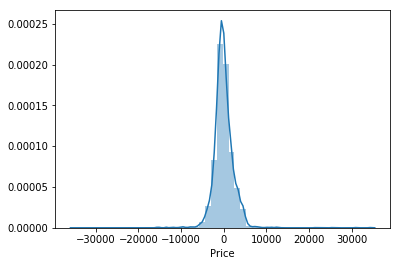

In [59]:
sns.distplot(y_test-y_pred)

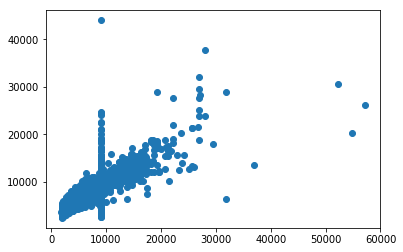

In [60]:
plt.scatter(y_test,y_pred)